# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [16]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from numpy import asarray
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 
from PIL import Image
import cv2

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

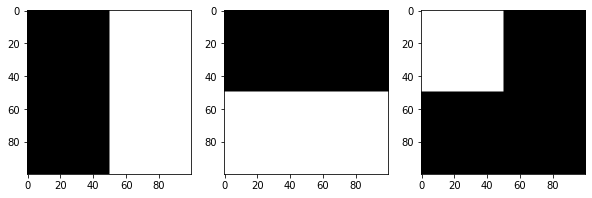

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


Text(0.5, 1.0, 'Quartered')

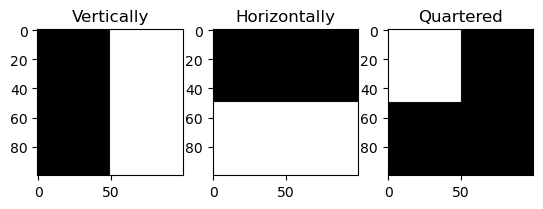

In [17]:
# 1. Vertically half black, half white
vertical_half = np.zeros((100, 100), dtype=np.uint8)
vertical_half[:, :50] = 0   # Left half black
vertical_half[:, 50:] = 255  # Right half white
vertical_half_image = Image.fromarray(vertical_half)

# Display first image
plt.subplot(1, 3, 1)
plt.imshow(vertical_half, cmap='gray')
plt.title('Vertically')

# 2. Horizontally half black, half white
horizontal_half = np.zeros((100, 100), dtype=np.uint8)
horizontal_half[:50, :] = 0   # Upper half black
horizontal_half[50:, :] = 255  # Bottom half white
horizontal_half_image = Image.fromarray(horizontal_half)

# Display second image
plt.subplot(1, 3, 2)
plt.imshow(horizontal_half, cmap='gray')
plt.title('Horizontally')

# 3. Quartered upper left white
quartered = np.zeros((100, 100), dtype=np.uint8)
quartered[:, :] = 0   # All black
quartered[:50, :50] = 255  # Upper left white
quartered_image = Image.fromarray(quartered)

# Display third image
plt.subplot(1, 3, 3)
plt.imshow(quartered, cmap='gray')
plt.title('Quartered')

*   Use the above three images to create the following image

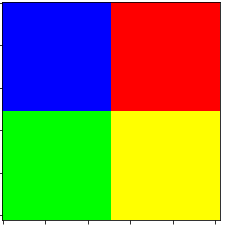
*Hint: Remember channels and color spaces*

Text(0.5, 1.0, 'Colored')

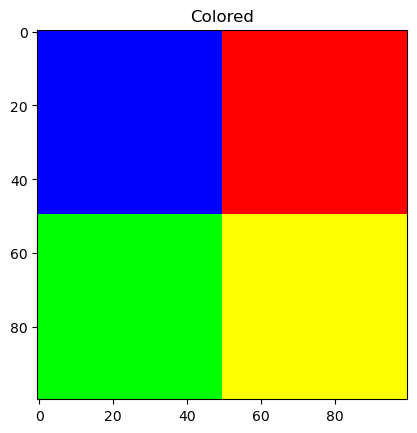

In [18]:
color = np.zeros((100, 100, 3), dtype=np.uint8)
color[:50, :50, 2] = 255  # Upper left blue
color[:50, 50:, 0] = 255  # Upper right red
color[50:, :50, 1] = 255  # Bottom left green
# Bottom right (yellow = Red + Green)
color[50:, 50:, 0] = 255  # Red 
color[50:, 50:, 1] = 255  # Green
color_image = Image.fromarray(color)

# Display third image
plt.imshow(color)
plt.title('Colored')

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

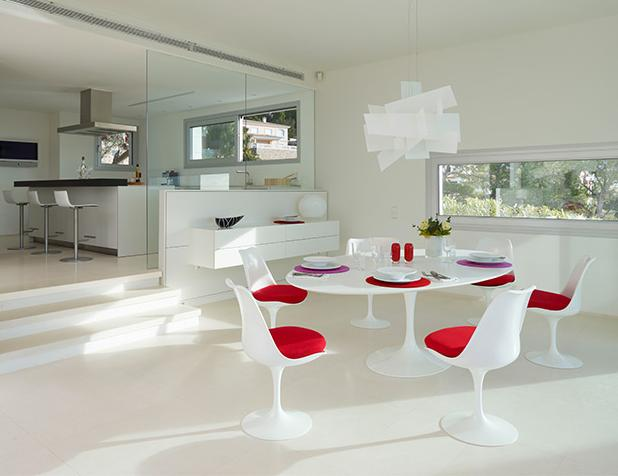

*   Extract individual channels and plot them using matplotlib subplot.

Text(0.5, 1.0, 'Blue')

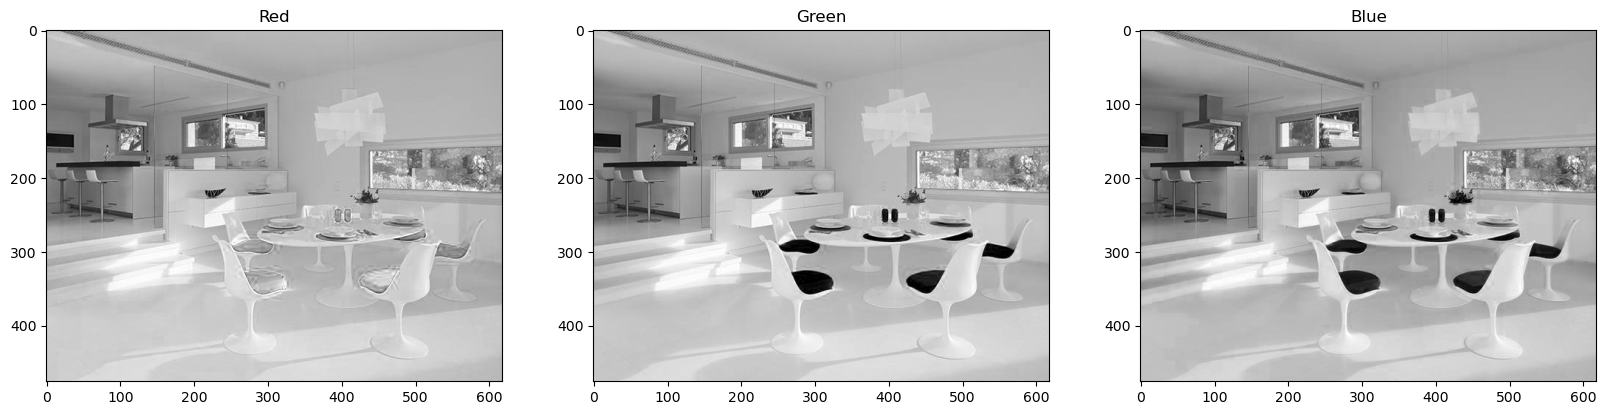

In [19]:
# Load the image
img = Image.open('images/sillas.jpg')

# Convert image to numpy array to manipulate it
sillas = asarray(img)

# Extract the individual channels
R, G, B = sillas[:, :, 0], sillas[:, :, 1], sillas[:, :, 2]

# Plot them
plt.figure(figsize=(20, 20))

plt.subplot(1, 3, 1)
plt.imshow(R, cmap='gray')
plt.title('Red')

plt.subplot(1, 3, 2)
plt.imshow(G, cmap='gray')
plt.title('Green')

plt.subplot(1, 3, 3)
plt.imshow(B, cmap='gray')
plt.title('Blue')

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

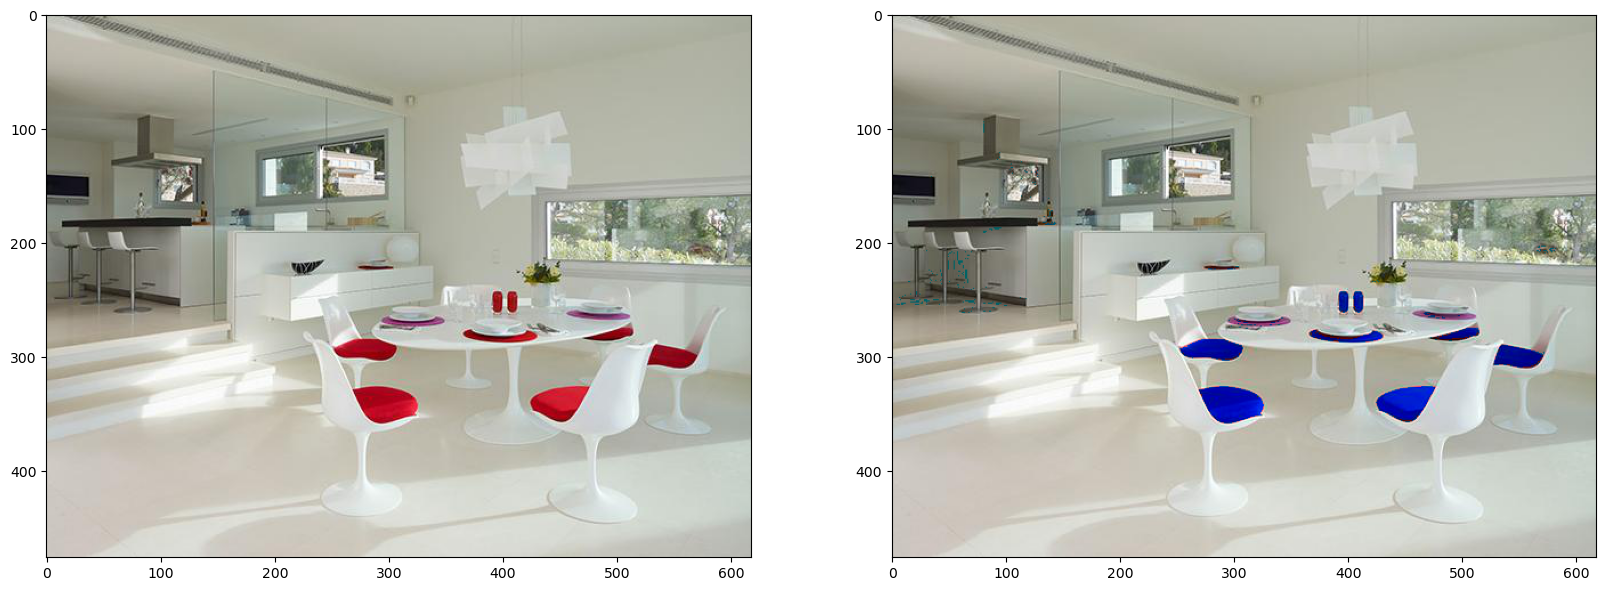

In [20]:
sillas2 = sillas.copy()

# We'll define "red" as places where the red channel is significantly stronger than the green and blue channels
red_pixels = np.where((sillas2[:, :, 0] > 100) & (sillas2[:, :, 2] < 100) & (sillas2[:, :, 1] < 100))

# Set the red areas to blue by setting the blue channel to the red channel's value, and zeroing the red channel
sillas2[red_pixels[0], red_pixels[1], 2] = sillas2[red_pixels[0], red_pixels[1], 0]

# Set red to 0
sillas2[red_pixels[0], red_pixels[1], 0] = 0

# Plot
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(sillas)
plt.subplot(1, 2, 2)
plt.imshow(sillas2)

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

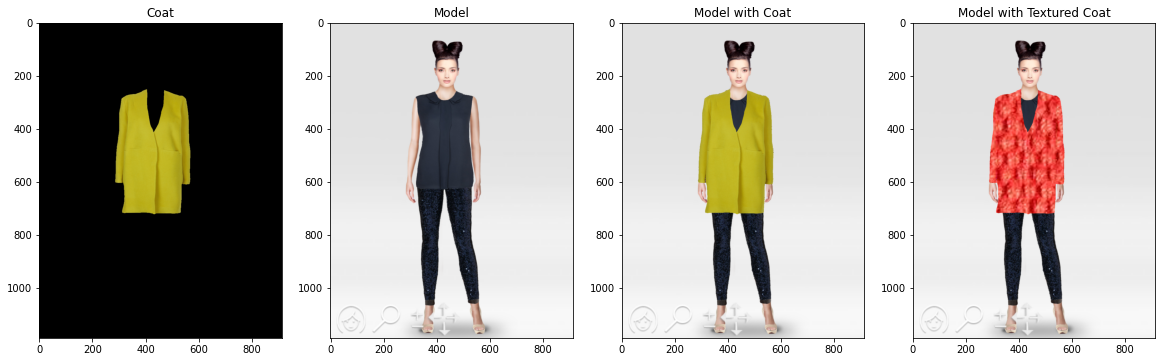

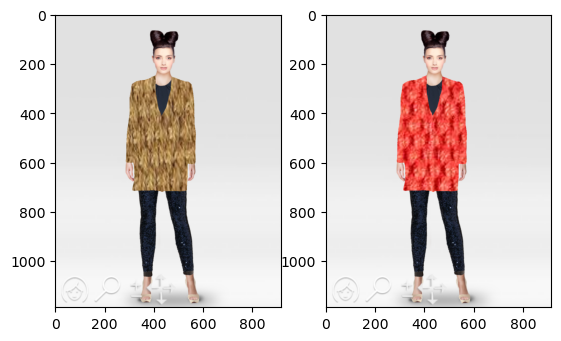

In [21]:
coat = cv2.imread('images\\coat.png')
model = cv2.imread('images\\model.png')
texture = cv2.imread('images\\texture.png')
texture2 = cv2.imread('images\\texture2.png')

# Ensure the coat and texture are of the same size
coat_resized = cv2.resize(coat, (model.shape[1], model.shape[0]))
texture_resized = cv2.resize(texture, (coat.shape[1], coat.shape[0]))
texture2_resized = cv2.resize(texture2, (coat.shape[1], coat.shape[0]))

# We convert the coat image to grayscale to create a mask
gray_coat = cv2.cvtColor(coat_resized, cv2.COLOR_BGR2GRAY)
_, coat_mask = cv2.threshold(gray_coat, 1, 255, cv2.THRESH_BINARY)

# Invert mask to use for model: where the original was white, new mask is black
coat_mask_inv = cv2.bitwise_not(coat_mask)

# Black-out the coat area in the model image
model_bg = cv2.bitwise_and(model, model, mask=coat_mask_inv)

# Take the region of coat and combine with texture
coat_texture = cv2.bitwise_and(texture_resized, texture_resized, mask=coat_mask)
coat_texture2 = cv2.bitwise_and(texture2_resized, texture2_resized, mask=coat_mask)

# Combine the model background and the textured coat
model_with_coat = cv2.add(model_bg, coat_texture)
model_with_coat2 = cv2.add(model_bg, coat_texture2)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(model_with_coat, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(model_with_coat2, cv2.COLOR_BGR2RGB))

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




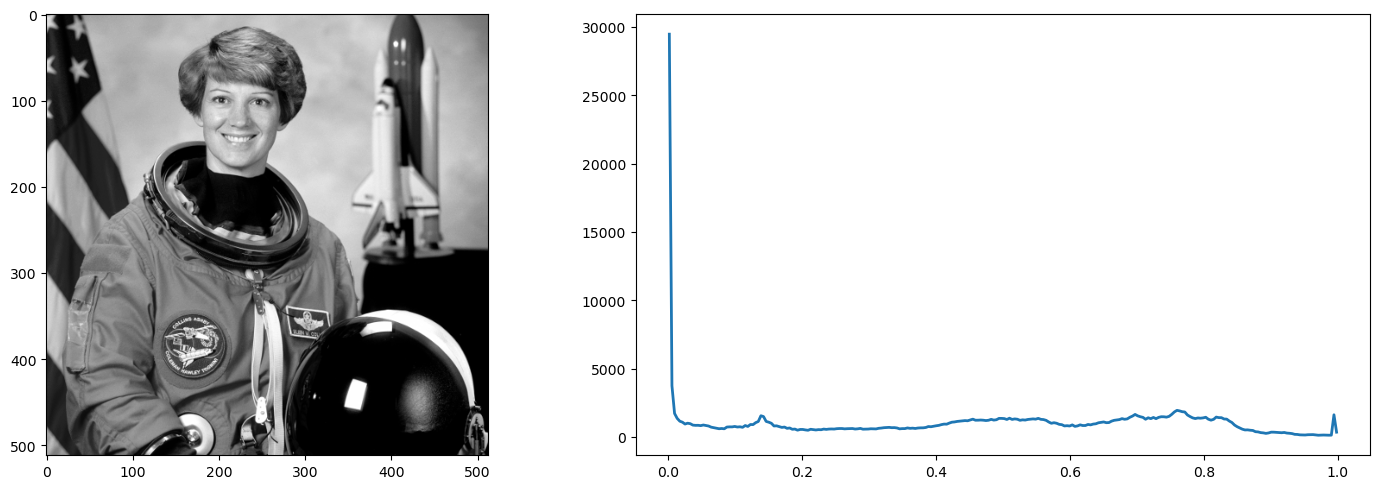

In [31]:
from skimage import color, data, exposure
image = data.astronaut()

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Compute the histogram of the image
hist, hist_centers = exposure.histogram(gray_image)

# Plot the grayscale image and the histogram
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.plot(hist_centers, hist, lw=2)

plt.tight_layout()
plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

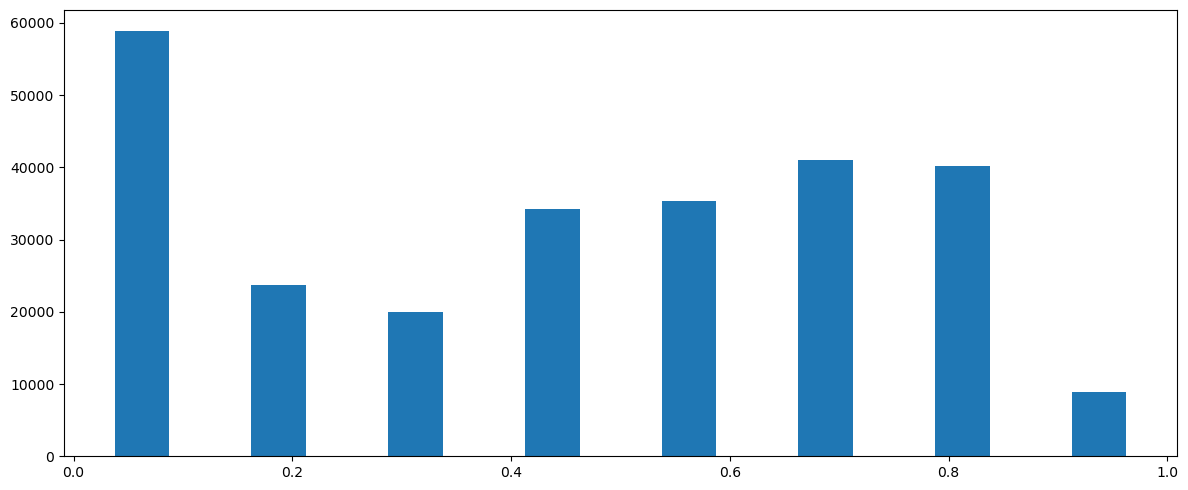

In [33]:
hist, bin_centers = exposure.histogram(gray_image, nbins=8)

plt.figure(figsize=(12, 5))
plt.bar(bin_centers, hist, width=0.05)
plt.tight_layout()
plt.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

The histogram now uses 8 bins, which groups the pixel intensities into broader ranges. Each bar represents how many pixels fall into that intensity range.

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


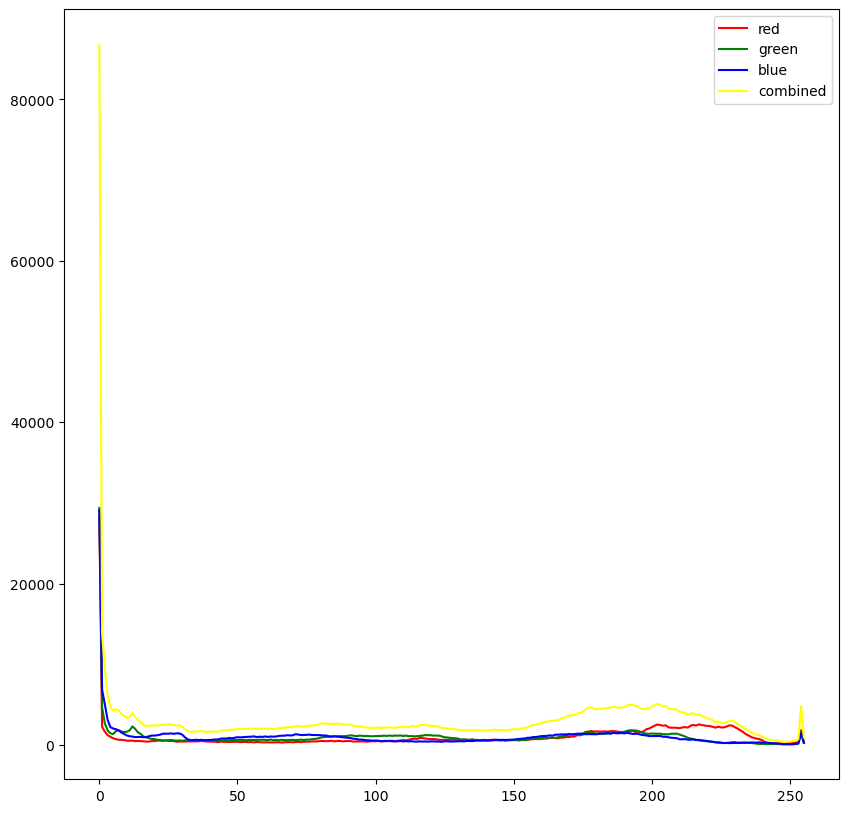

In [10]:
# Compute the histogram for each channel
hist_r, bin_centers_r = exposure.histogram(image[:, :, 0], nbins=256)
hist_g, bin_centers_g = exposure.histogram(image[:, :, 1], nbins=256)
hist_b, bin_centers_b = exposure.histogram(image[:, :, 2], nbins=256)

plt.figure(figsize=(10, 10))

plt.plot(hist_r, color='red', label='red')
plt.plot(hist_g, color='green', label='green')
plt.plot(hist_b, color='blue',label='blue')
plt.plot(hist_r + hist_g + hist_b, color='yellow', label='combined')

plt.legend()

plt.show()

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



c:\Users\crvid\anaconda3\Lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


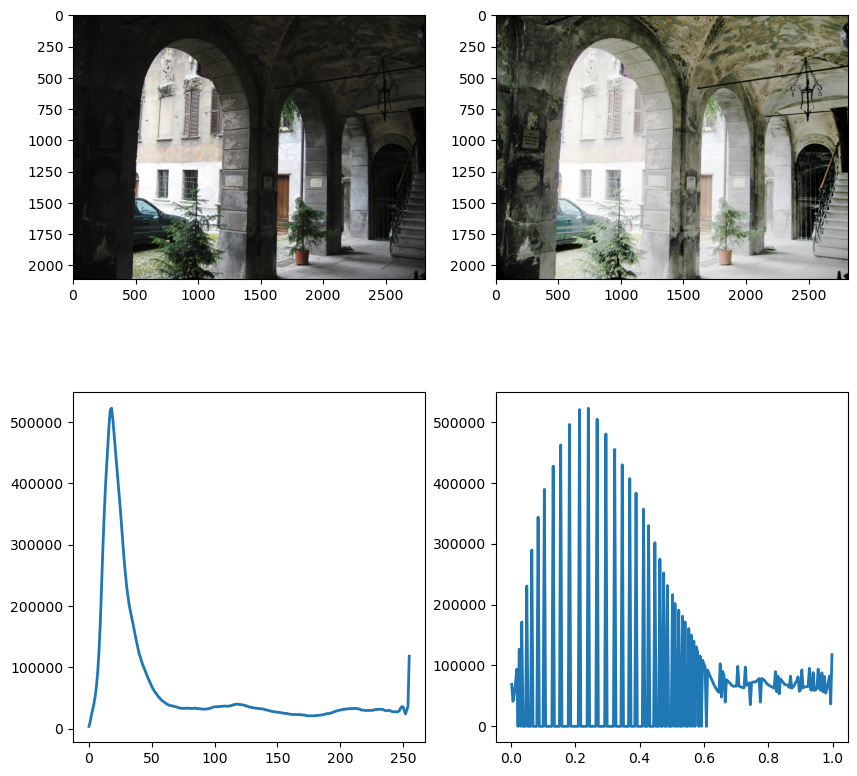

In [11]:
# Read the aquatermi image
aquatermi = io.imread("./images/aquatermi_lowcontrast.jpg")

# Compute the histogram of the original image
hist_orig, bin_centers_orig = exposure.histogram(aquatermi)

# Perform histogram equalization 
equalized_aquatermi = exposure.equalize_hist(aquatermi)

# Compute the histogram of the equalized image
hist_eq, bin_centers_eq = exposure.histogram(equalized_aquatermi)

# Use 2x2 subplot to show both images
plt.subplots(2, 2, figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(aquatermi)

plt.subplot(2, 2, 2)
plt.imshow(equalized_aquatermi)

plt.subplot(2, 2, 3)
plt.plot(bin_centers_orig, hist_orig, lw=2)

plt.subplot(2, 2, 4)
plt.plot(bin_centers_eq, hist_eq, lw=2)


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

Histogram equalization uses CDF to redistribute intensity values and improve contrast in a nonlinear way, especially in areas of low contrast.
Linear contrast stretching simply scales the pixel intensities linearly between the minimum and maximum values, keeping the overall structure of the histogram intact.

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



c:\Users\crvid\anaconda3\Lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


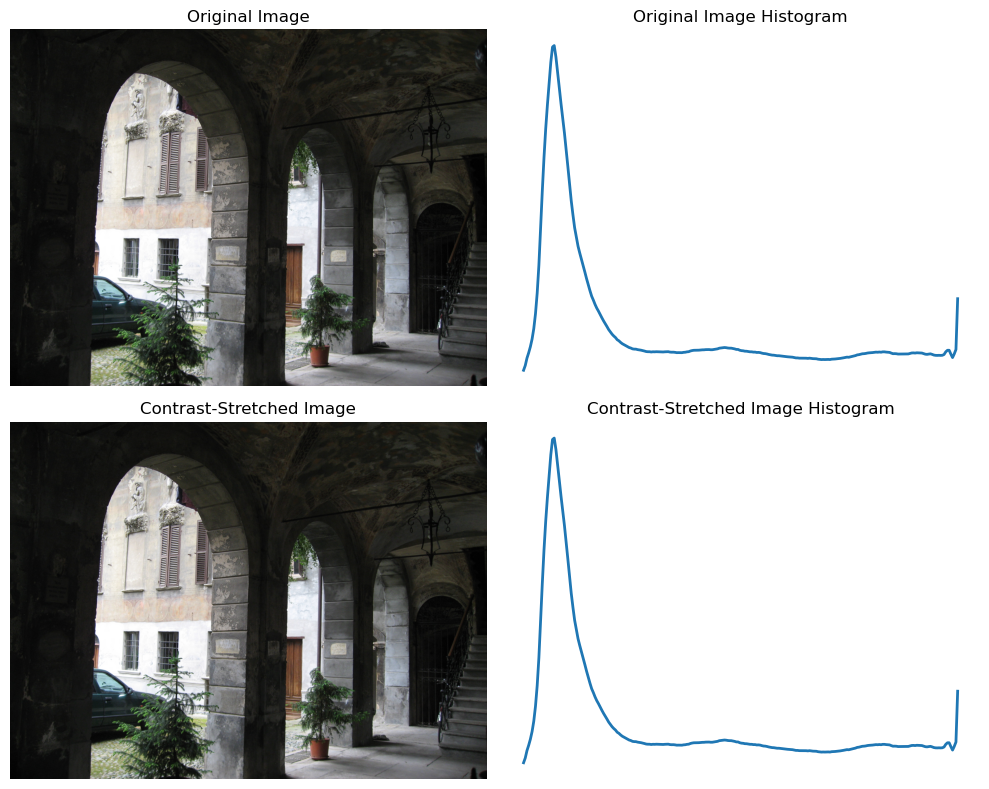

<Figure size 640x480 with 0 Axes>

In [38]:
# Load the grayscale image
aquatermi = io.imread("./images/aquatermi_lowcontrast.jpg")
aqua_gray = cv2.cvtColor(aquatermi, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Linear contrast stretch function
def linear_contrast_stretch(image, bins):
    # Find the minimum and maximum pixel values in the image
    min_val = np.min(image)
    max_val = np.max(image)
    
    # Perform linear contrast stretching
    stretched_image = (image - min_val) / (max_val - min_val) * 255
    stretched_image = stretched_image.astype(np.uint8)  # Convert to uint8 for proper image format
    
    return stretched_image

# Define the number of bins
bins = 256

# Apply the function
enhanced_image = linear_contrast_stretch(aquatermi, bins)

# Calculate the histograms for the original and the enhanced imaged
hist, bins = exposure.histogram(aquatermi)
hist_stretched, bins_stretched = exposure.histogram(enhanced_image)

# Plot the original image, enhanced image and their histograms
plt.subplots(2, 2, figsize=(10, 8))
    
# Original image
plt.subplot(2, 2, 1)
plt.imshow(aquatermi, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Original image Histogram
plt.subplot(2, 2, 2)
plt.plot(bins, hist, lw=2)
plt.title('Original Image Histogram')
plt.axis('off')

# Contrast-stretched image
plt.subplot(2, 2, 3)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Contrast-Stretched Image')
plt.axis('off')

# Contrast_stretched image Histogram
plt.subplot(2, 2, 4)
plt.plot(bins_stretched, hist_stretched, lw=2)
plt.title('Contrast-Stretched Image Histogram')
plt.axis('off')

plt.tight_layout()
plt.show()
    
# Histogram of the Enhanced Image
axs[1, 1].hist(enhanced_image.ravel(), bins=bins, color='black')
axs[1, 1].set_title('Histogram of Enhanced Image')
    
plt.tight_layout()
plt.show()

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




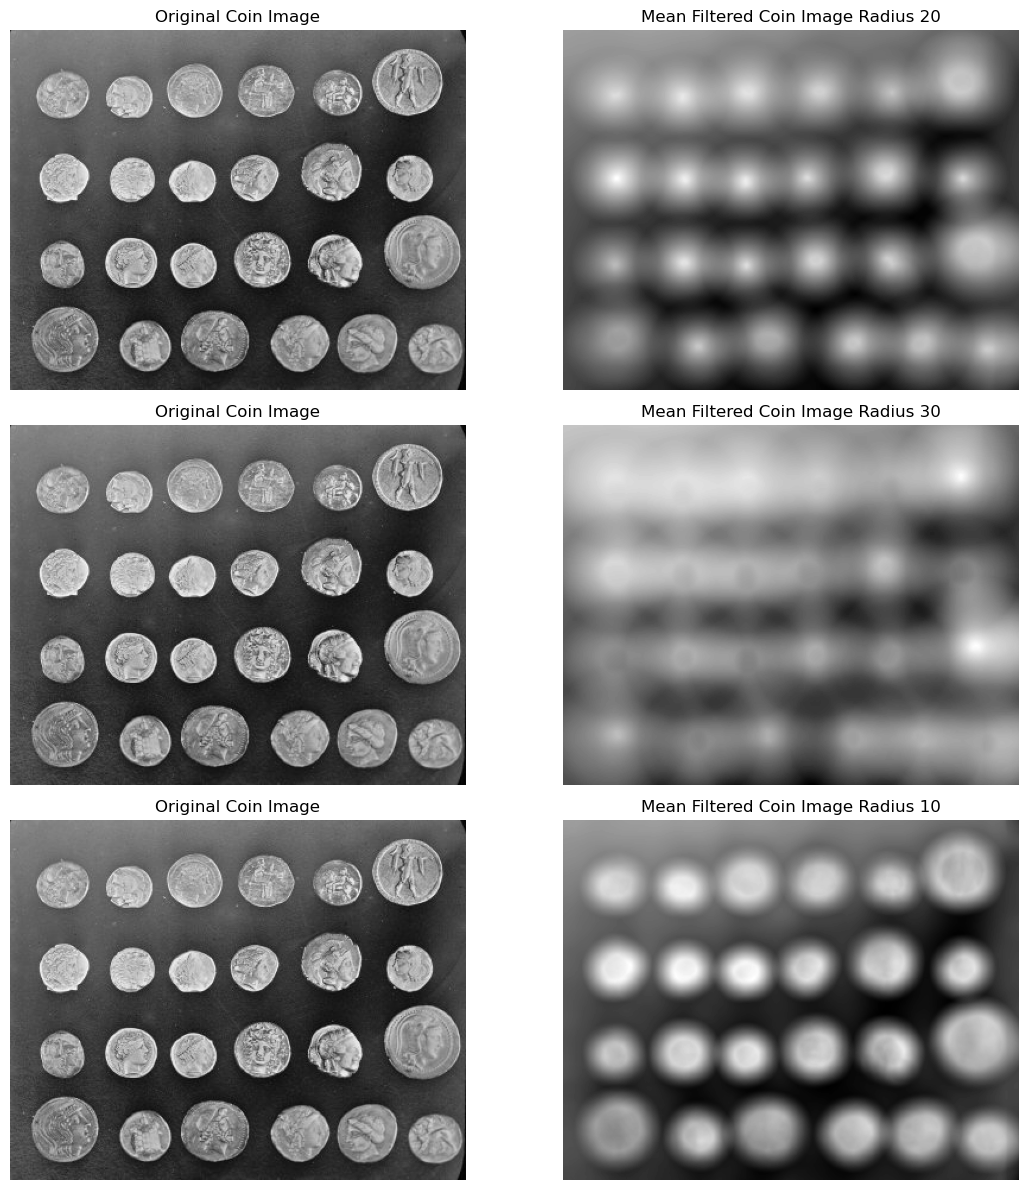

In [39]:
coin = data.coins() 
# Step 1: Define the radius
radius_20 = 20
radius_30 = 30
radius_10 = 10

# Step 2: Create a disk structuring element
selem_20 = morphology.disk(radius_20)
selem_30 = morphology.disk(radius_30)
selem_10 = morphology.disk(radius_10)

# The mean filter requires the input image to be in uint8 format
filtered_image_20 = filters.rank.mean(coin, selem_20)
filtered_image_30 = filters.rank.mean(coin, selem_30)
filtered_image_10 = filters.rank.mean(coin, selem_10)

# Step 4: Display the original and filtered images
plt.subplots(3, 2, figsize=(12,12))

# Original image
plt.subplot(3, 2, 1)
plt.imshow(coin, cmap='gray')
plt.title('Original Coin Image')
plt.axis('off')

# Filtered image
plt.subplot(3, 2, 2)
plt.imshow(filtered_image_20, cmap='gray')
plt.title('Mean Filtered Coin Image Radius 20')
plt.axis('off')

# Original image
plt.subplot(3, 2, 3)
plt.imshow(coin, cmap='gray')
plt.title('Original Coin Image')
plt.axis('off')

# Filtered image
plt.subplot(3, 2, 4)
plt.imshow(filtered_image_30, cmap='gray')
plt.title('Mean Filtered Coin Image Radius 30')
plt.axis('off')# Original image
plt.subplot(3, 2, 5)
plt.imshow(coin, cmap='gray')
plt.title('Original Coin Image')
plt.axis('off')

# Filtered image
plt.subplot(3, 2, 6)
plt.imshow(filtered_image_10, cmap='gray')
plt.title('Mean Filtered Coin Image Radius 10')
plt.axis('off')

plt.tight_layout()
plt.show()



*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

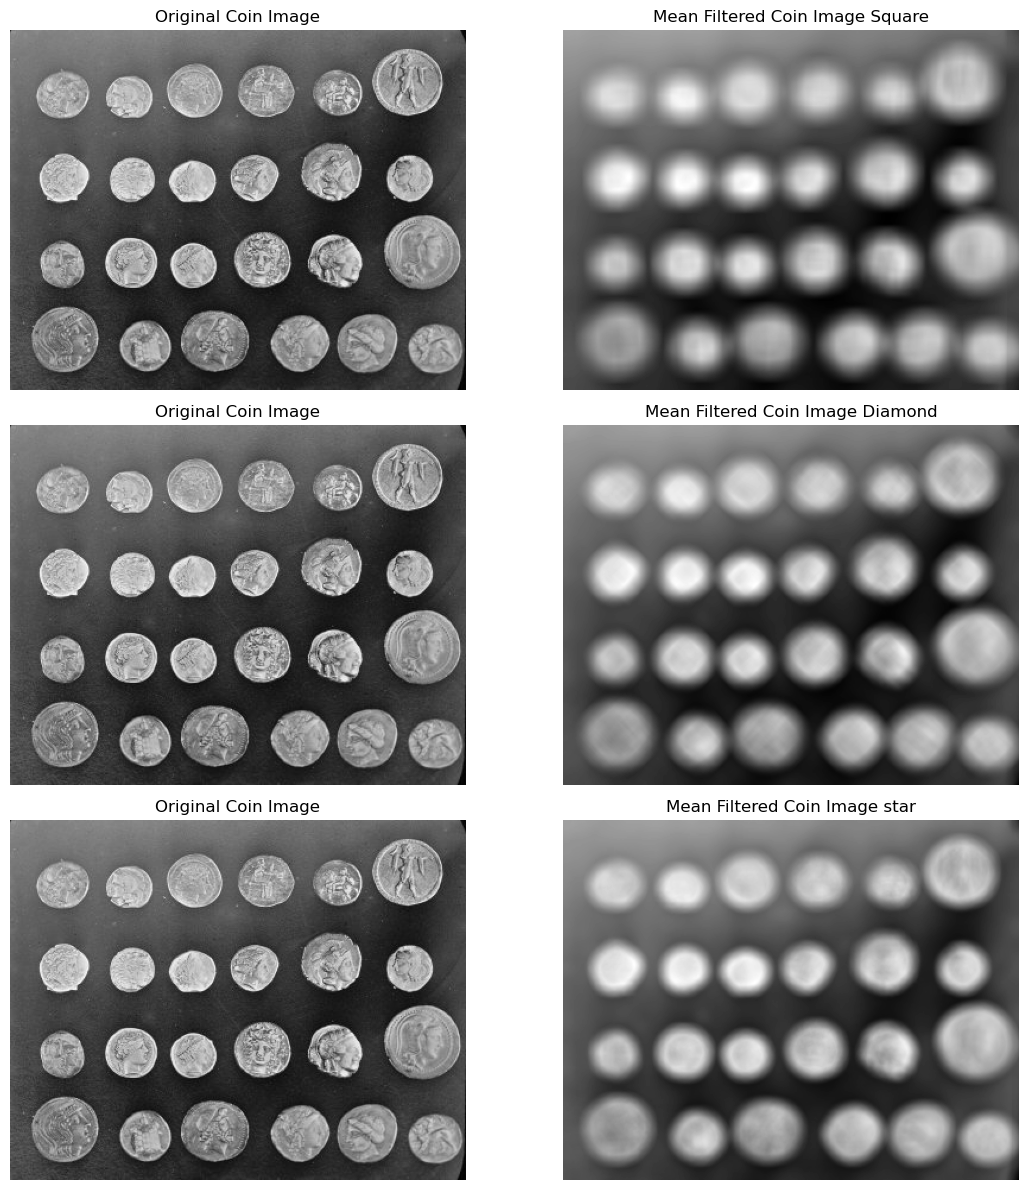

In [40]:
# Step 1: Define the radius
radius_20 = 20
radius_30 = 30
radius_10 = 10

# Step 2: Create a disk structuring element
selem_square = morphology.square(width=20)
selem_diamond = morphology.diamond(radius=10)
selem_star = morphology.star(a=5)

# The mean filter requires the input image to be in uint8 format
filtered_image_square = filters.rank.mean(coin, selem_square)
filtered_image_diamond = filters.rank.mean(coin, selem_diamond)
filtered_image_star = filters.rank.mean(coin, selem_star)

# Step 4: Display the original and filtered images
plt.subplots(3, 2, figsize=(12,12))

# Original image
plt.subplot(3, 2, 1)
plt.imshow(coin, cmap='gray')
plt.title('Original Coin Image')
plt.axis('off')

# Filtered image
plt.subplot(3, 2, 2)
plt.imshow(filtered_image_square, cmap='gray')
plt.title('Mean Filtered Coin Image Square')
plt.axis('off')

# Original image
plt.subplot(3, 2, 3)
plt.imshow(coin, cmap='gray')
plt.title('Original Coin Image')
plt.axis('off')

# Filtered image
plt.subplot(3, 2, 4)
plt.imshow(filtered_image_diamond, cmap='gray')
plt.title('Mean Filtered Coin Image Diamond')
plt.axis('off')
# Original image
plt.subplot(3, 2, 5)
plt.imshow(coin, cmap='gray')
plt.title('Original Coin Image')
plt.axis('off')

# Filtered image
plt.subplot(3, 2, 6)
plt.imshow(filtered_image_star, cmap='gray')
plt.title('Mean Filtered Coin Image star')
plt.axis('off')


plt.tight_layout()
plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*(Double-click or enter to edit)*

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*(Double-click or enter to edit)*

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

*(Double-click or enter to edit)*

...